#### Sr. Engineer: Dhruv Singh <br> Course Name: EDHEC Portfolio Optimization <br> Lesson Name: Downside Risk Measures <br> Date Updated: 01/09/2022

# Downside Measures: SemiDeviation, VaR and CVaR

In [1]:
import pandas as pd
import edhec_risk_kit_106 as erk
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
hfi = erk.get_hfi_returns()

In [3]:
def semideviation(r):
    """
    Returns the semideviation aka negative semideviation of r
    r must be a Series or a DataFrame, else raises a TypeError
    """
    is_negative = r < 0
    return r[is_negative].std(ddof=0)


In [4]:
erk.semideviation(hfi)

QQQ    0.024835
IWF    0.026602
VOO    0.028051
SPY    0.028148
dtype: float64

In [5]:
hfi[hfi<0].std(ddof=0)

QQQ    0.024835
IWF    0.026602
VOO    0.028051
SPY    0.028148
dtype: float64

In [6]:
erk.semideviation(hfi).sort_values()

QQQ    0.024835
IWF    0.026602
VOO    0.028051
SPY    0.028148
dtype: float64

In [7]:
ffme = erk.get_ffme_returns()
erk.semideviation(ffme)

QQQ    0.024835
IWF    0.026602
VOO    0.028051
SPY    0.028148
dtype: float64

In [8]:
# This will not work: erk.semideviation([1,2,3,4])

# VaR and CVaR

We'll look at three different ways to compute Value At Risk

1. Historic VaR
2. Parametric Gaussian VaR
3. Modified (Cornish-Fisher) VaR

In [9]:
# computing var at 5% level
# ie, number such that 5% of the returns fall below that number
import numpy as np
np.percentile(hfi, 5, axis=0)

array([-0.06325893, -0.06156429, -0.06050145, -0.06036877])

In [10]:
erk.var_historic(hfi, level=1)

QQQ    0.084734
IWF    0.088281
VOO    0.089294
SPY    0.088665
dtype: float64

For reporting purposes, it is common to invert the sign so we report a positive number to represent the _loss_ i.e. the amount that is at risk.

# Conditional VaR aka Beyond VaR

In [11]:
erk.cvar_historic(hfi, level=1).sort_values()

QQQ    0.087585
IWF    0.096114
VOO    0.110943
SPY    0.111665
dtype: float64

In [12]:
erk.cvar_historic(ffme)

QQQ    0.077143
IWF    0.078210
VOO    0.081310
SPY    0.081505
dtype: float64

## Parametric Gaussian VaR

In [13]:
# converting var level to z-score
# and obtaining return level that lies below if
from scipy.stats import norm
norm.ppf(.5)

0.0

In [14]:
norm.ppf(.16)

-0.994457883209753

In [15]:
erk.var_gaussian(hfi)

QQQ    0.056336
IWF    0.053256
VOO    0.052317
SPY    0.052401
dtype: float64

In [16]:
erk.var_historic(hfi)

QQQ    0.063259
IWF    0.061564
VOO    0.060501
SPY    0.060369
dtype: float64

# Cornish-Fisher Modification

The Cornish-Fisher modification is an elegant and simple adjustment. Adjusts for z-score if a distribution of returns is not normal. Can use skewness and kurtosis to do so. 

<AxesSubplot:title={'center':'ETFs: VaR at 5%'}>

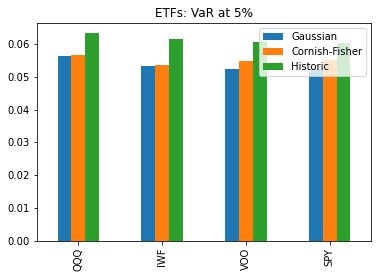

In [17]:
var_table = [erk.var_gaussian(hfi), 
             erk.var_gaussian(hfi, modified=True), 
             erk.var_historic(hfi)]
comparison = pd.concat(var_table, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']
comparison.plot.bar(title="ETFs: VaR at 5%")

In some cases, the cornish-fisher VaR is lower i.e. estimates a smaller loss than you would get from a pure gaussian assumption. That can happen if the observed skewness is positive

In [18]:
erk.skewness(hfi).sort_values(ascending=False)

QQQ   -0.032678
IWF   -0.084573
VOO   -0.352829
SPY   -0.359901
dtype: float64